In [86]:
import librosa
import librosa.display
import numpy as np
import os
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

 https://analyticsindiamag.com/a-tutorial-on-spectral-feature-extraction-for-audio-analytics/

In [87]:
FilesNames =os.listdir(f"Test_Lan")

In [88]:
fileExt = r".wav"
FilesNames = [_ for _ in FilesNames if _.endswith(fileExt)]

In [89]:
FilesNames

['Ar.wav', 'du.wav', 'en.wav', 'fr.wav', 'it.wav', 'pot.wav', 'sp.wav']

# Some information about speaking sound

<B>Asaresult, a speech signal when recorded with a microphone from a distance has approximately a −6dB/octave slope downward compared to the true spectrum of the vocal tract</b>

<B>The speech signal is a slowly time-varying or quasi-stationary signal.</B>

# mel spectrogram 

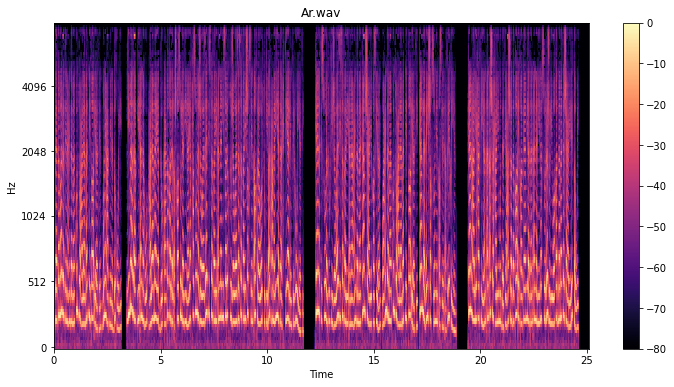

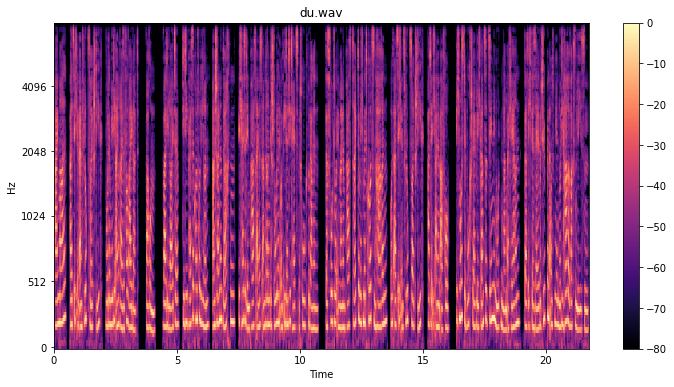

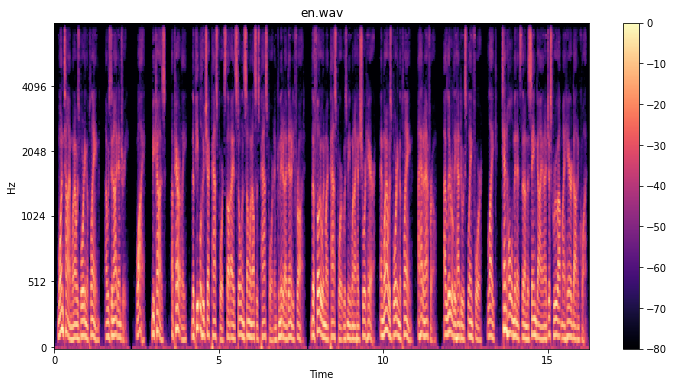

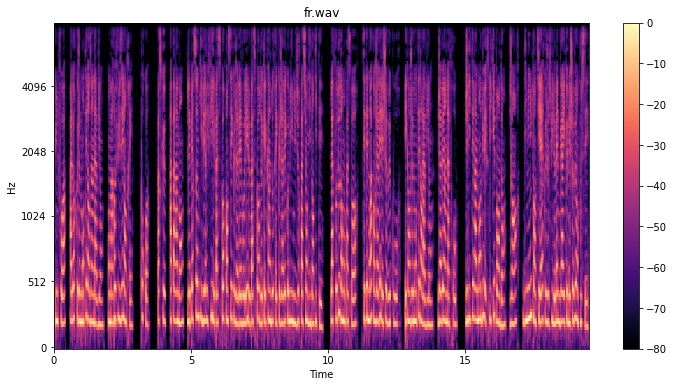

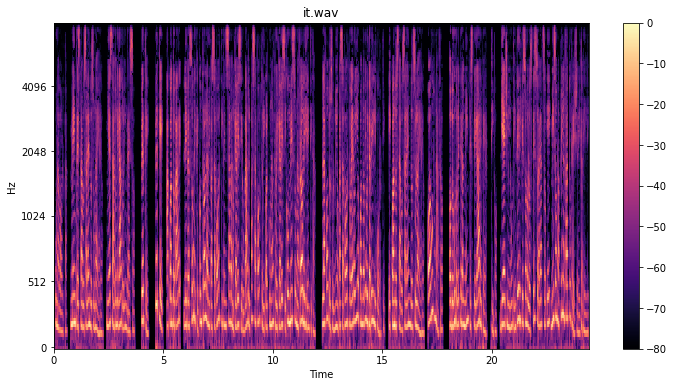

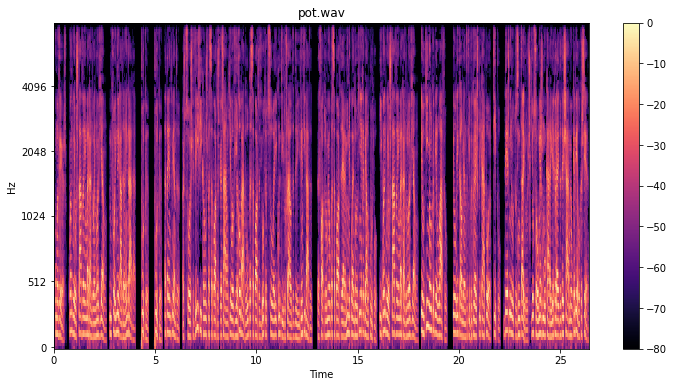

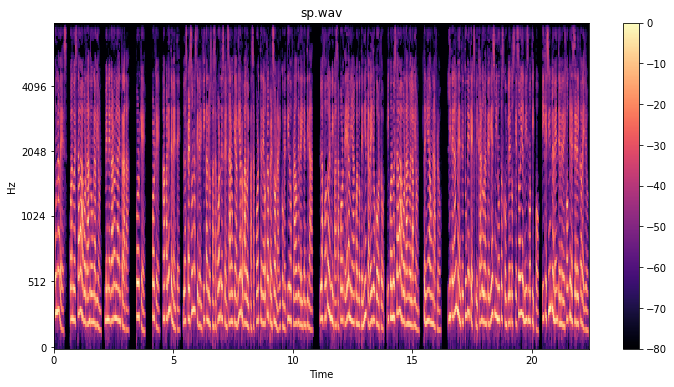

In [128]:
for File in FilesNames:
    plt.figure(figsize=(12,6))
    
    y, sr = librosa.load(f"Test_Lan/{File}",sr=16000)

    librosa.feature.mfcc(y=y, sr=sr)

    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)

    img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000)

    plt.title(File)
    plt.colorbar(img)
    plt.show()

# MFCC

 <b>The MFCC feature extraction technique basically includes windowing the signal, applying the DFT, taking the log of the magnitude, 
and then warping the frequencies on a Mel scale, followed by applying the inverse DCT. <b>


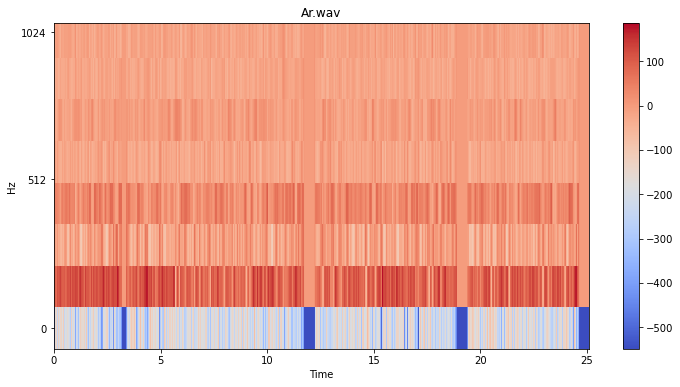

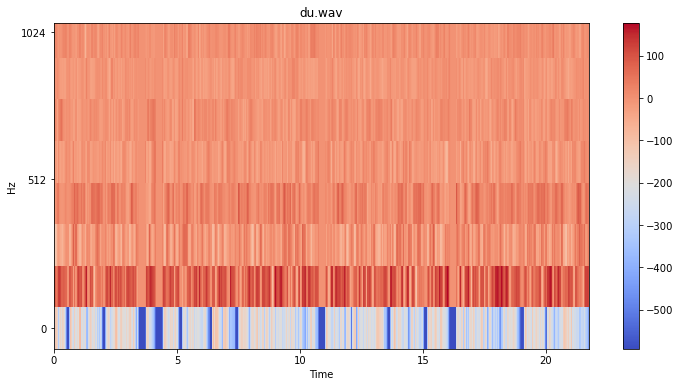

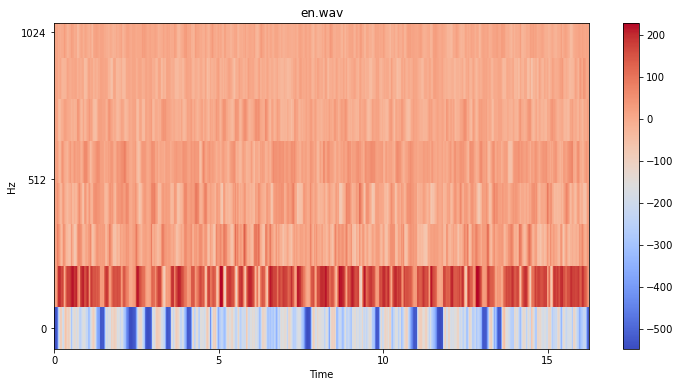

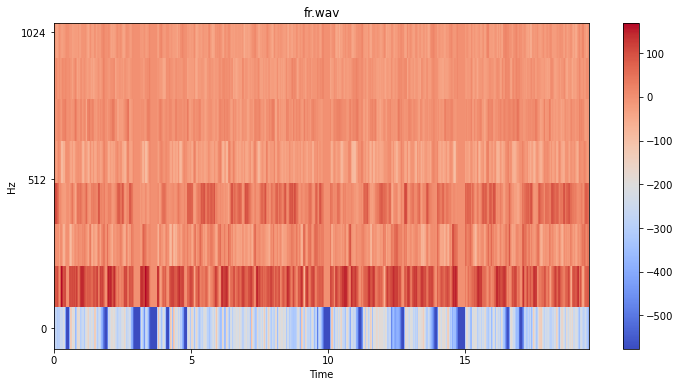

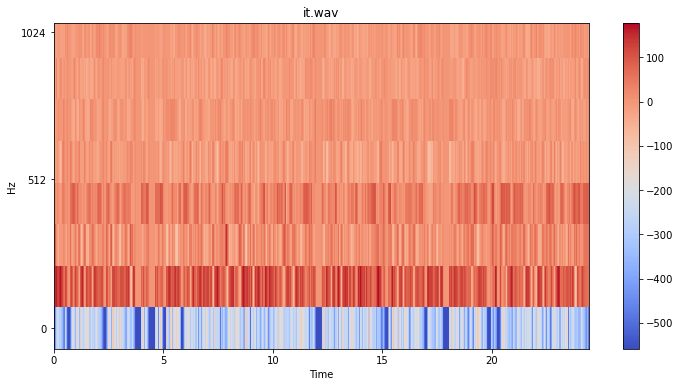

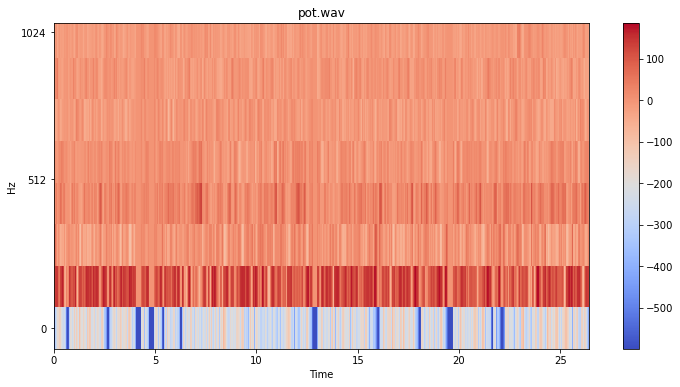

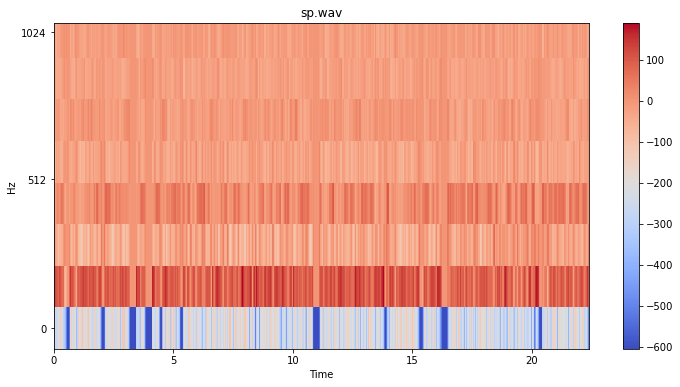

In [145]:
for File in FilesNames:
    plt.figure(figsize=(12,6))
    y, sr = librosa.load(f"Test_Lan/{File}",sr=16000)

    librosa.feature.mfcc(y=y, sr=sr)

    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=1000)

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=8)

    img = librosa.display.specshow(mfccs,
                               x_axis='time', y_axis='mel', fmax=1000)

    plt.title(File)
    plt.colorbar(img)
    plt.show()

# spectral_bandwidth

<b>Bandwidth is the difference between the upper and lower frequencies in a continuous band of frequencies. As we know the signals oscillate about a point so if the point is the centroid of the signal then the sum of maximum deviation of the signal on both sides of the point can be considered as the bandwidth of the signal at that time frame.

The spectral bandwidth can be computed by

(sum_k S[k, t] * (freq[k, t] - centroid[t])**p)**(1/p)

Where p is order and t is time.

</b>

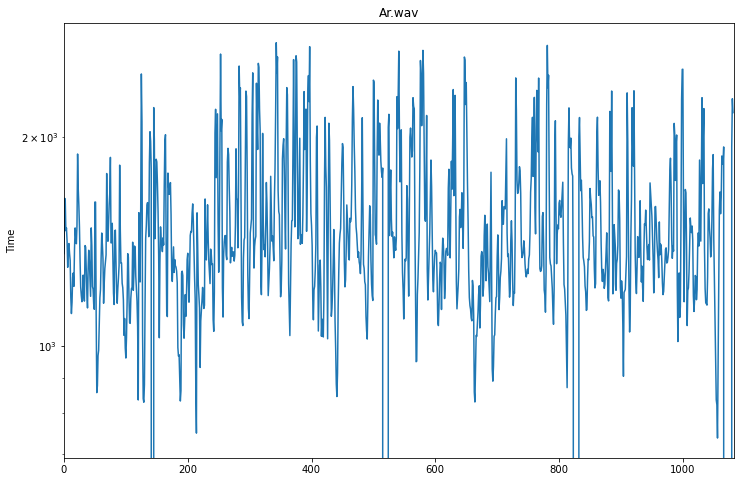

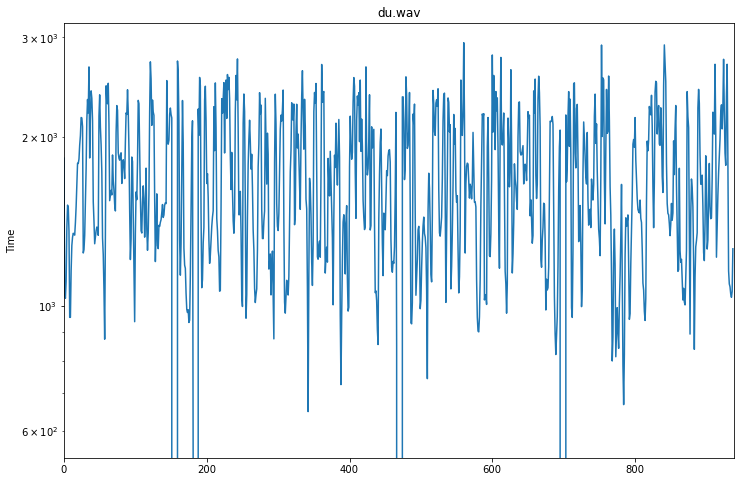

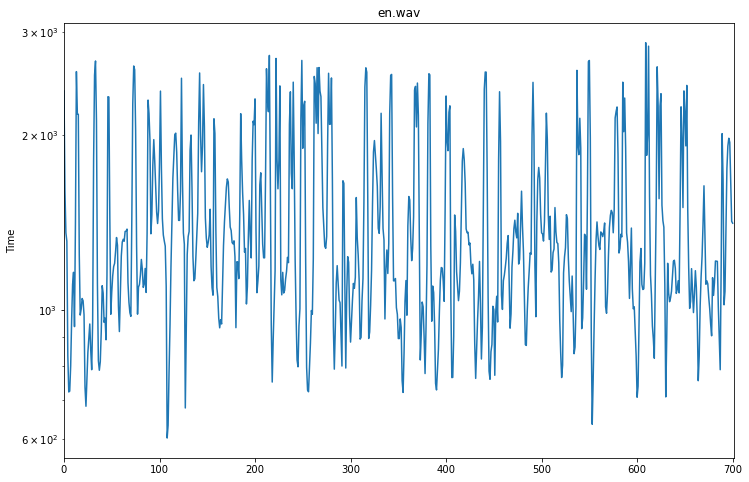

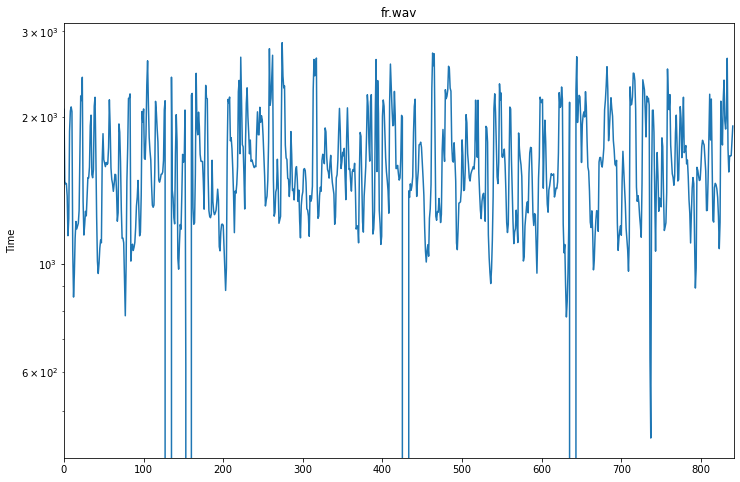

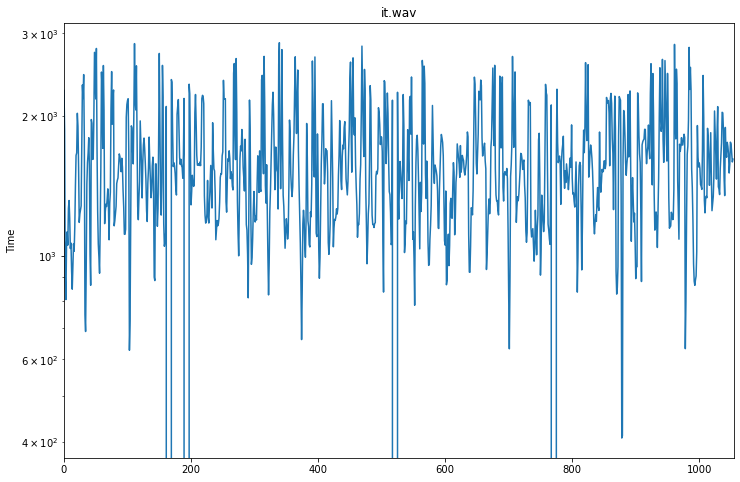

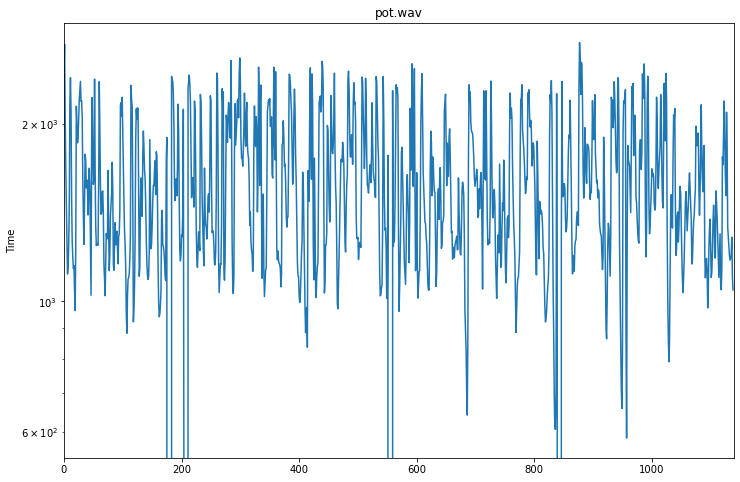

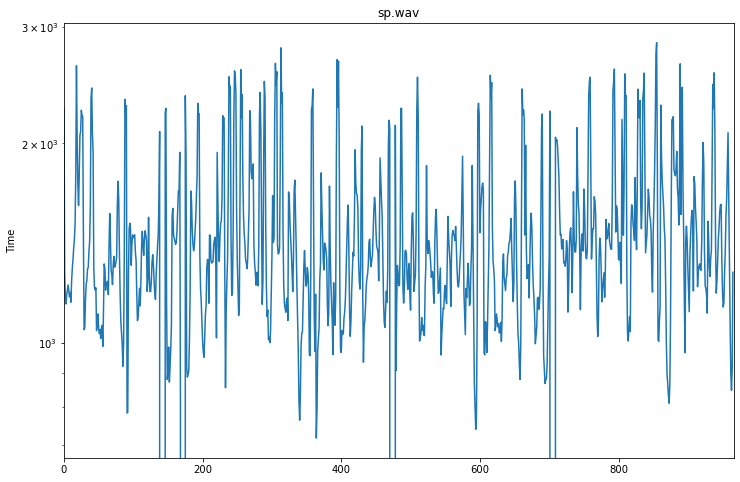

In [138]:
for File in FilesNames:
    
    y, sr = librosa.load(f"Test_Lan/{File}",sr=16000)

  
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    plt.figure(figsize=(12,8))
    plt.semilogy(spec_bw.T, label='Spectral bandwidth')
    plt.title(File)
    plt.ylabel('Hz')
    plt.ylabel('Time')
    plt.xlim([0, spec_bw.shape[1]])
    plt.show()

# Spectral contrast


<B>
In an audio signal, the spectral contrast is the measure of the energy of frequency at each timestamp. Since most of the audio files contain the frequency whose energy is changing with time. It becomes difficult to measure the level of energy. Spectral contrast is a way to measure that energy variation.



</b>

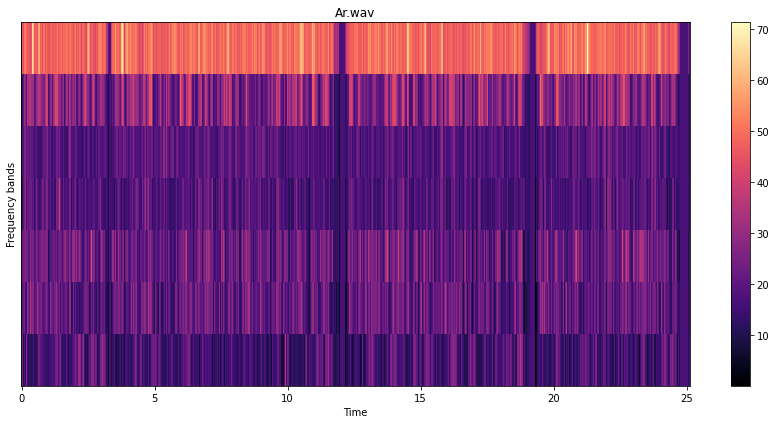

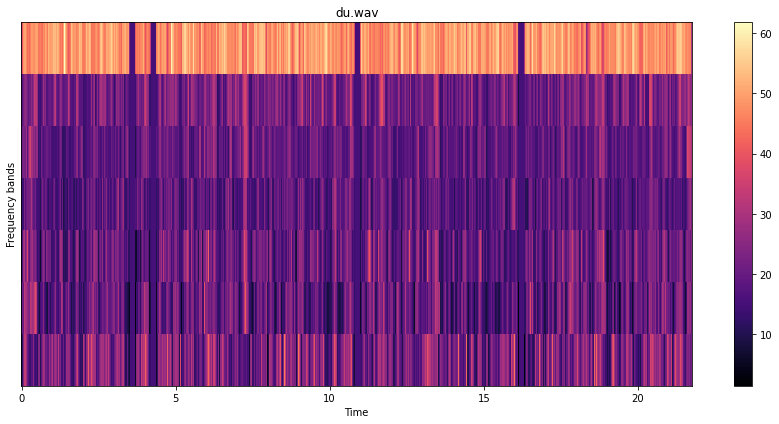

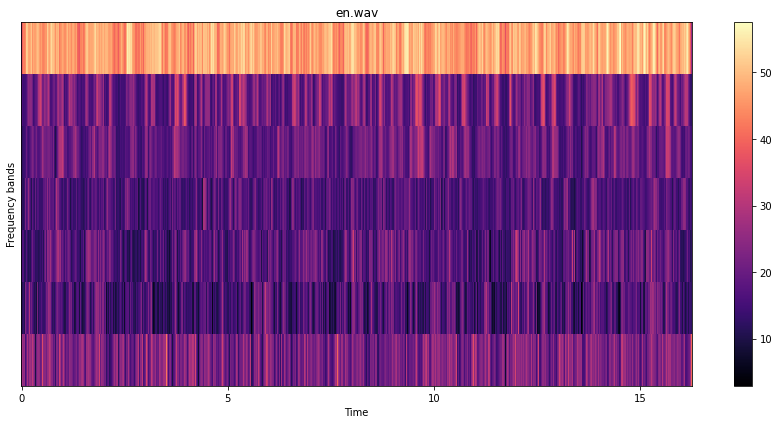

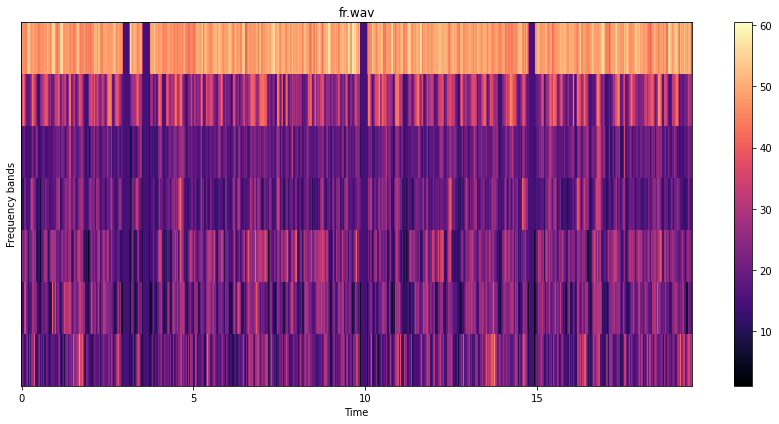

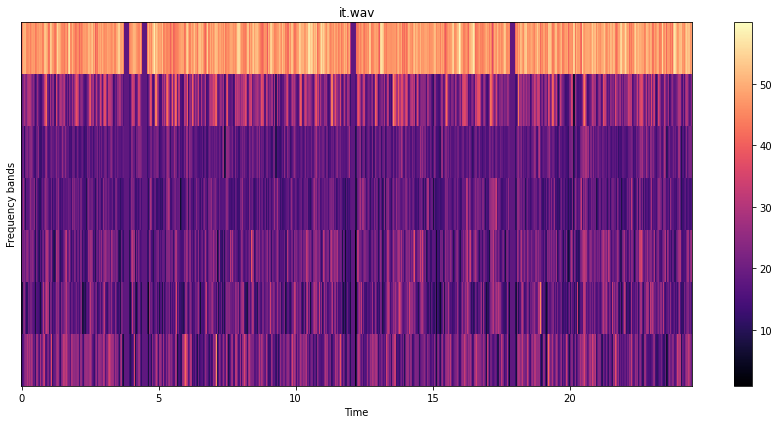

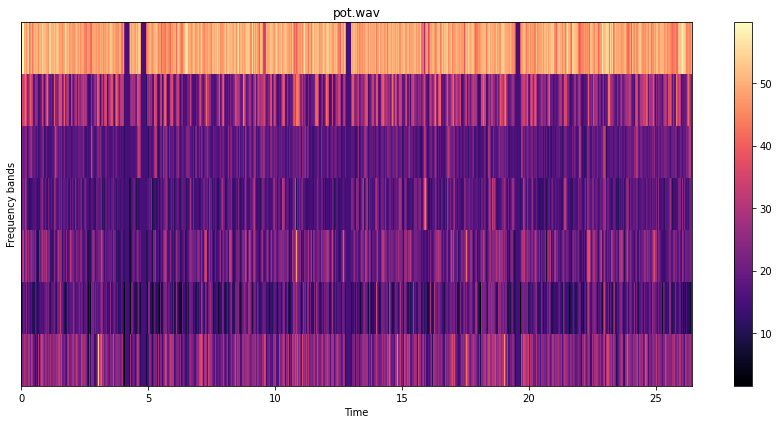

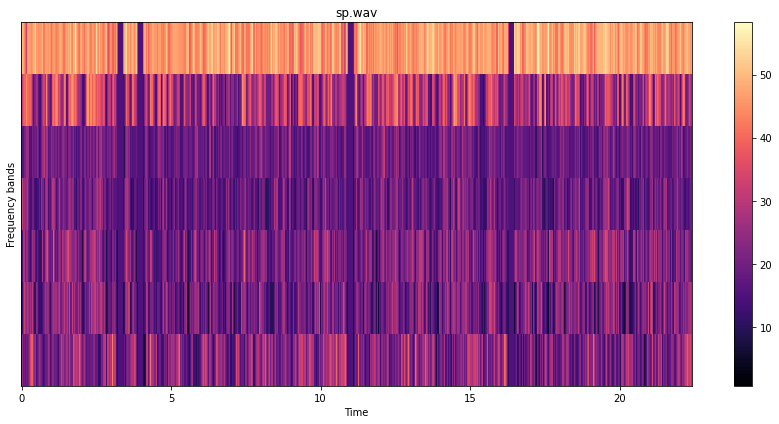

In [109]:
for File in FilesNames:
    
    y, sr = librosa.load(f"Test_Lan/{File}",sr=16000)

    S = np.abs(librosa.stft(y))    
    contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
    plt.figure(figsize=(12,6))

    img = librosa.display.specshow(contrast, x_axis='time')
    plt.title(File)
    plt.tight_layout()
    plt.colorbar(img)
    plt.ylabel('Frequency bands')

    plt.show()

# Spectral roll-off

<b>It can be defined as the action of a specific type of filter which is designed to roll off the frequencies outside to a specific range. The reason we call it roll-off is because it is a gradual procedure. There can be two kinds of filters: hi-pass and low pass and both can roll off the frequency from a signal going outside of their range.

more formally we can say The spectral roll-off point is the fraction of bins in the power spectrum at which 85% of the power is at lower frequencies

This can be used for calculating the maximum and minimum by setting up the roll percent to a value close to 1 and 0. </B>


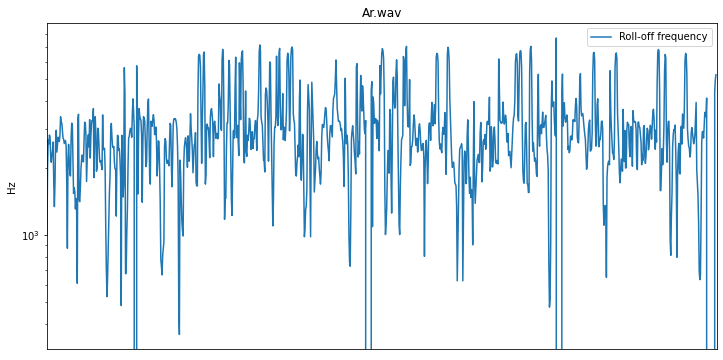

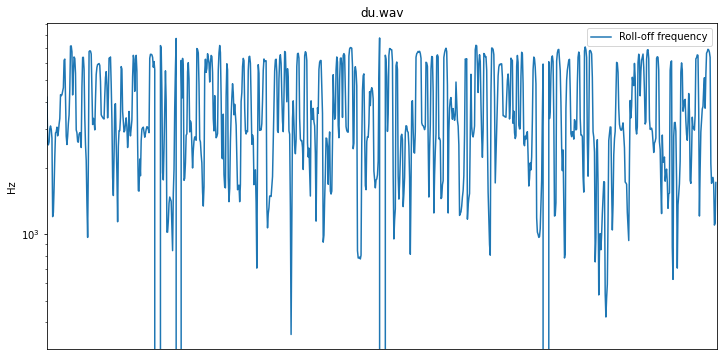

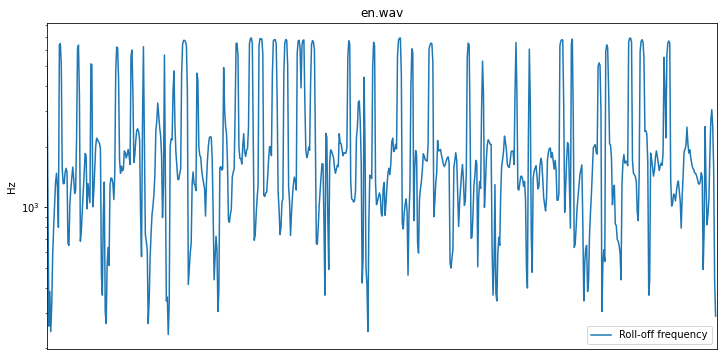

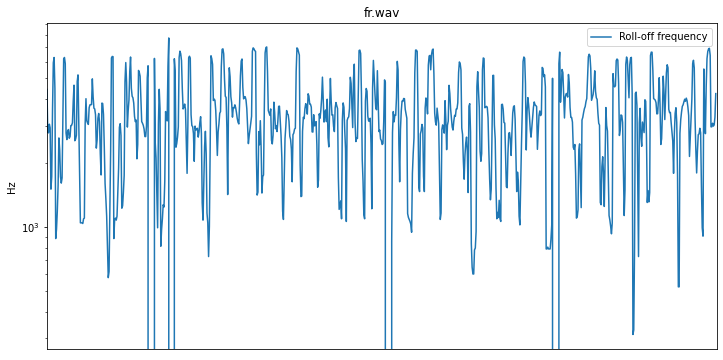

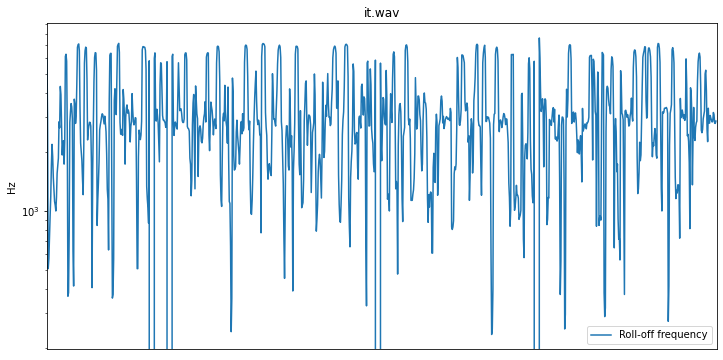

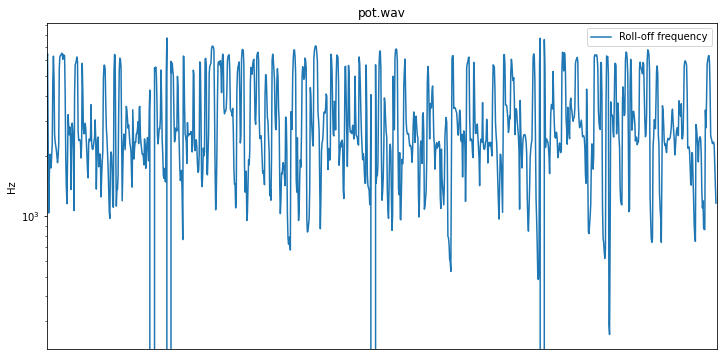

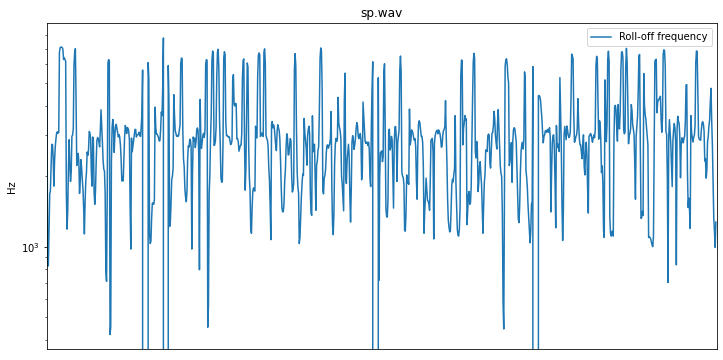

In [139]:
for File in FilesNames:
    
    plt.figure(figsize=(12,6))

    y, sr = librosa.load(f"Test_Lan/{File}",sr=16000)

    S, phase = librosa.magphase(librosa.stft(y))

    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    plt.semilogy(rolloff.T, label='Roll-off frequency')
    plt.ylabel('Hz')
    plt.xticks([])
    plt.xlim([0, rolloff.shape[-1]])

    plt.legend()
    
    
    plt.title(File)
    plt.show()

# Spectral flatness

<b>Spectral flatness or tonality coefficient, also known as Wiener entropy,is a measure used in digital signal processing to characterize an audio spectrum. Spectral flatness is typically measured in decibels, and provides a way to quantify how much a sound resembles a pure tone, as opposed to being noise-like.</b>

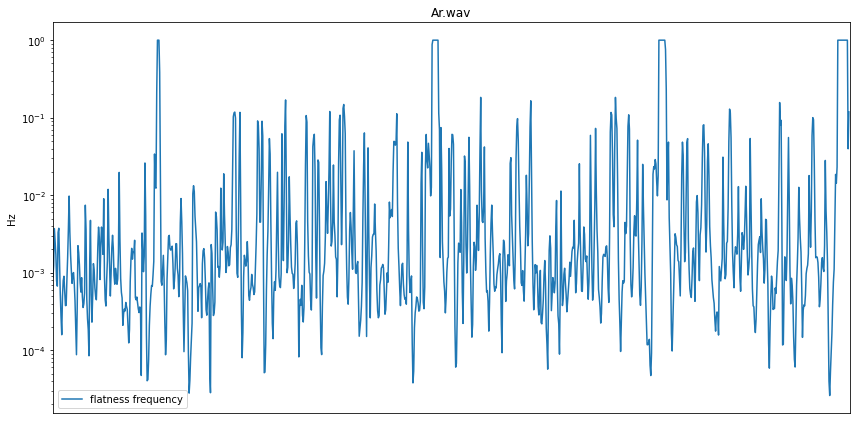

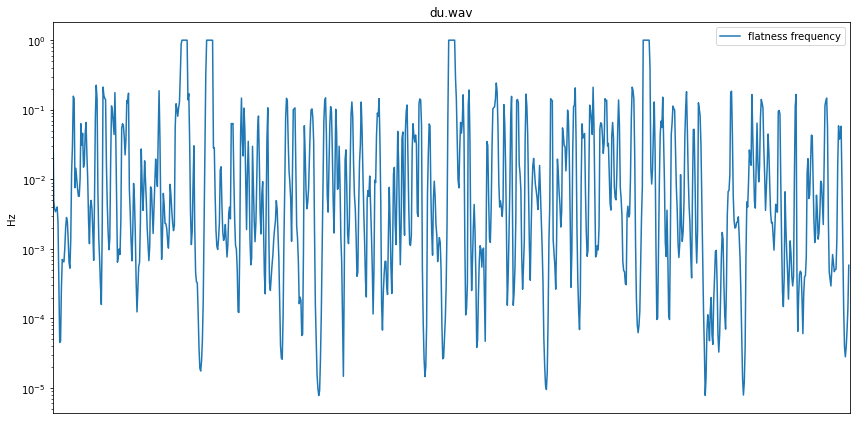

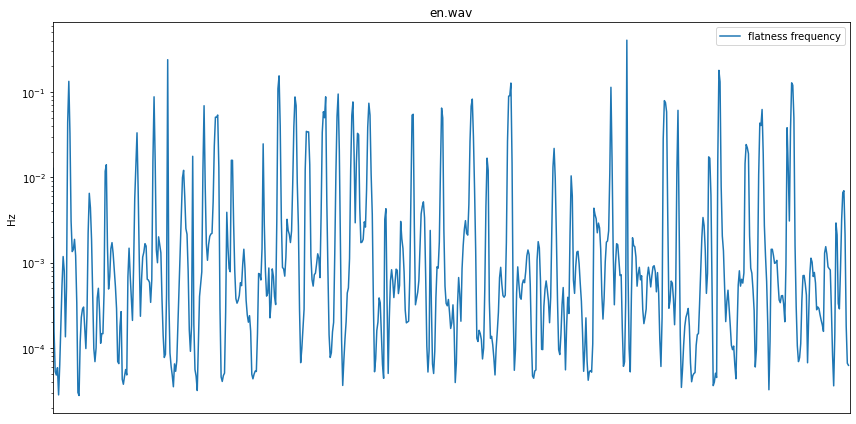

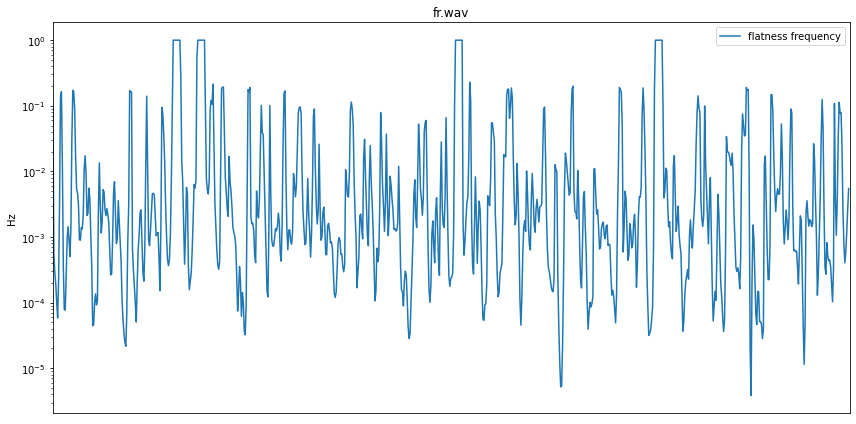

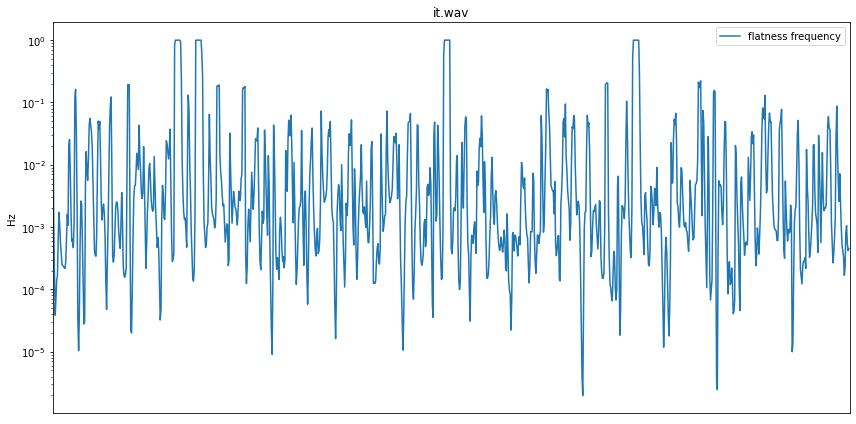

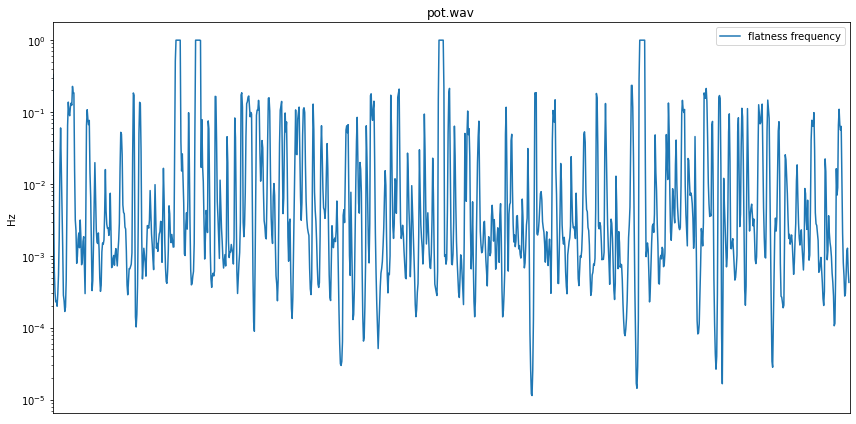

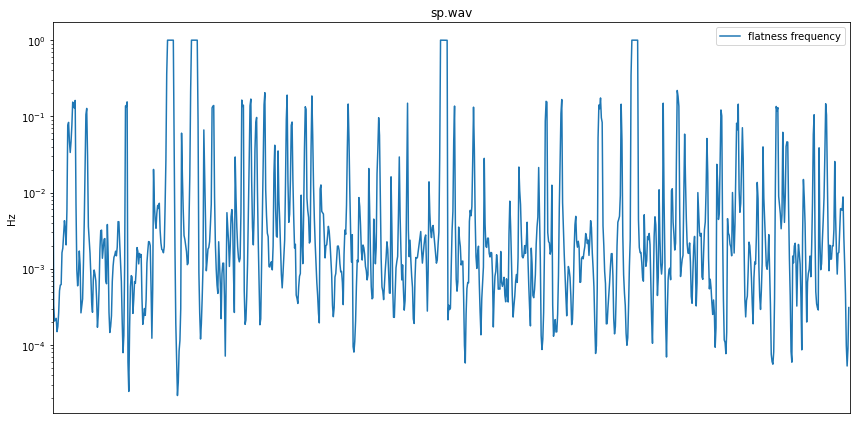

In [123]:
for File in FilesNames:
    
    plt.figure(figsize=(12,6))

    y, sr = librosa.load(f"Test_Lan/{File}",sr=16000)

    S, phase = librosa.magphase(librosa.stft(y))

    flatness = librosa.feature.spectral_flatness(S=S)
    plt.semilogy(flatness.T, label='flatness frequency')
    plt.ylabel('Hz')
    plt.xticks([])
    plt.xlim([0, flatness.shape[-1]])

    plt.legend()
    
    
    plt.title(File)
    plt.tight_layout()
    plt.show()

# Spectral Centroid

<b> As the name suggests, a spectral centroid is the location of the centre of mass of the spectrum. </b>

<b> In some places, it can be considered as the median of the spectrum but there is a difference between the measurement of the spectral centroid and median of the spectrum. The spectral centroid is like a weighted median and the median of the spectrum is similar to the mean. Both of them measure the central tendency of the signal. In some cases, both of them show similar results. </b>

<B>Mathematically it can be determined by the Fourier transform of the signals with the weights. <b>

<img src="spec_centriod.png"/>

<B>Using the spectral centroid we can predict the brightness in an audio file. It is widely used in the measurement of the tone quality of any audio file.</B>

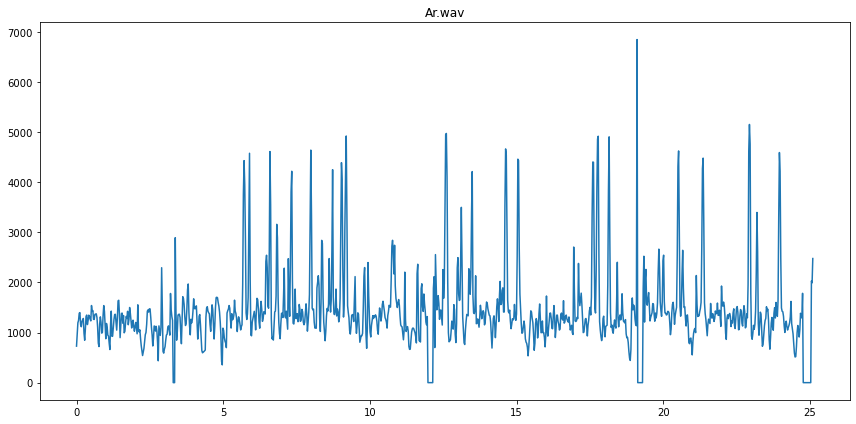

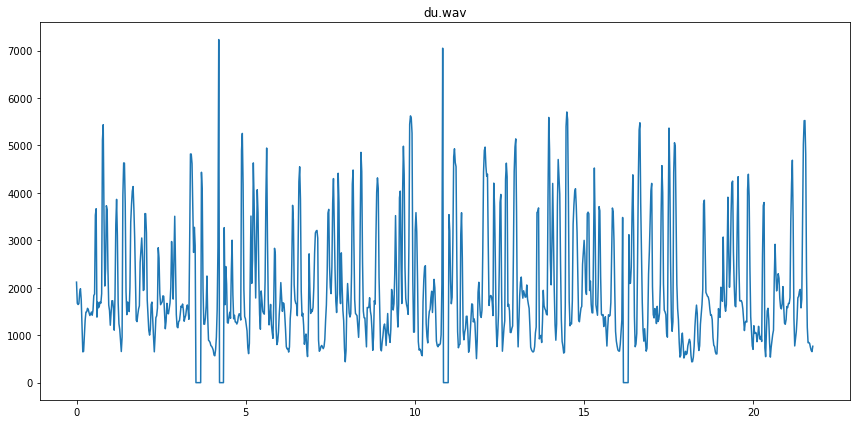

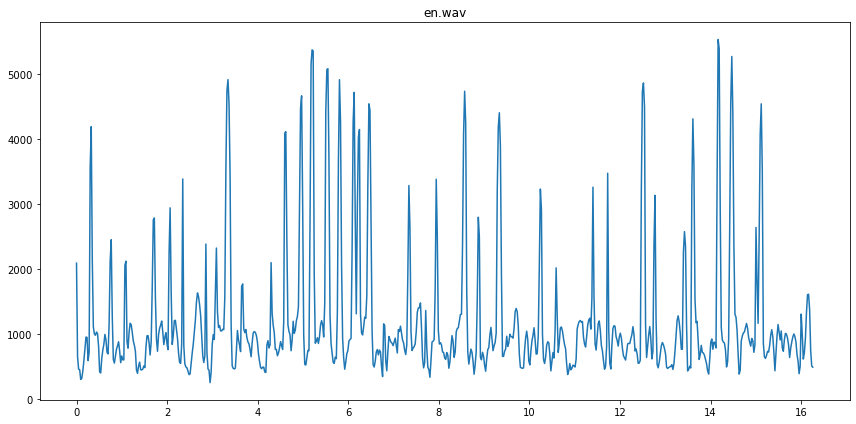

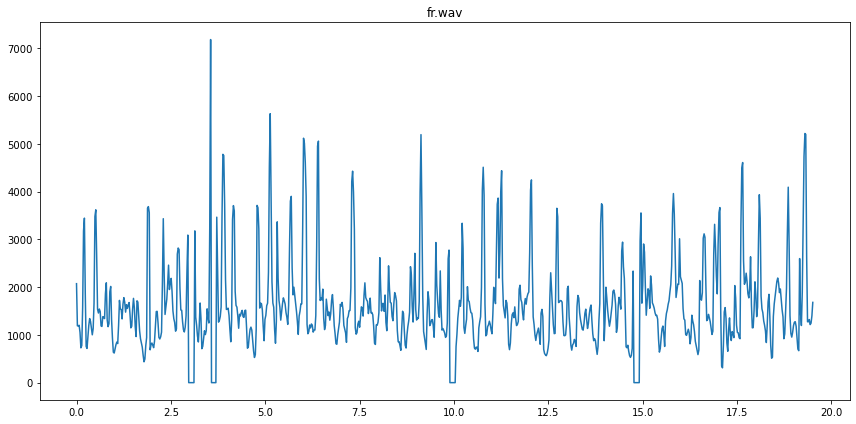

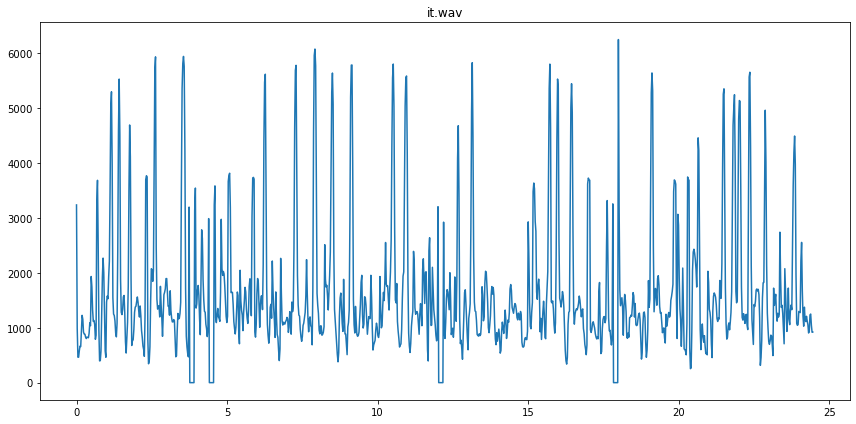

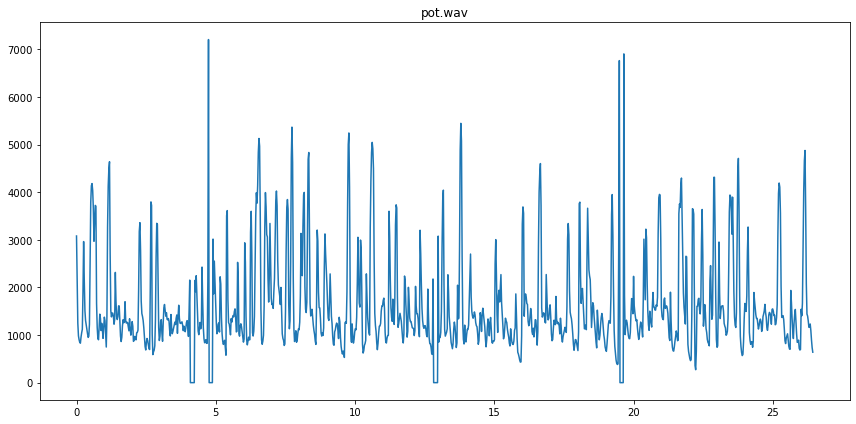

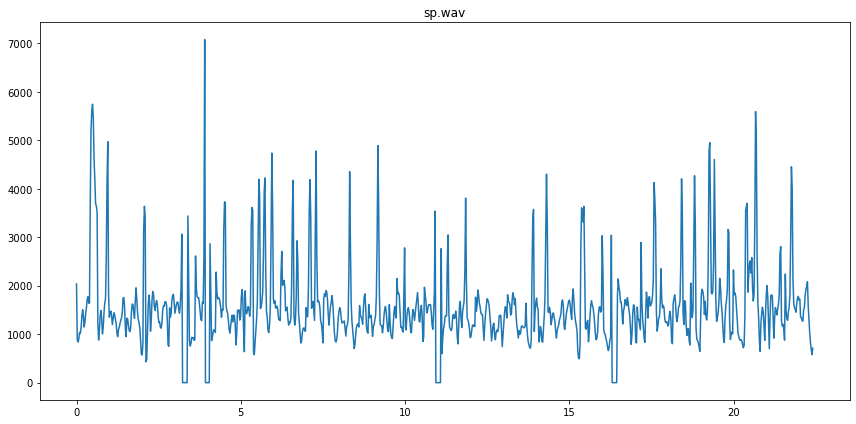

In [126]:
for File in FilesNames:
    
    plt.figure(figsize=(12,6))

    y, sr = librosa.load(f"Test_Lan/{File}",sr=16000)

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    times = librosa.times_like(cent)
    
   
    plt.plot(times, cent.T, label='Spectral centroid')
    plt.ylabel("Hz")
    plt.xlabel("Time")
    plt.title(File)
    plt.tight_layout()
    plt.show()

# Power Spectogram

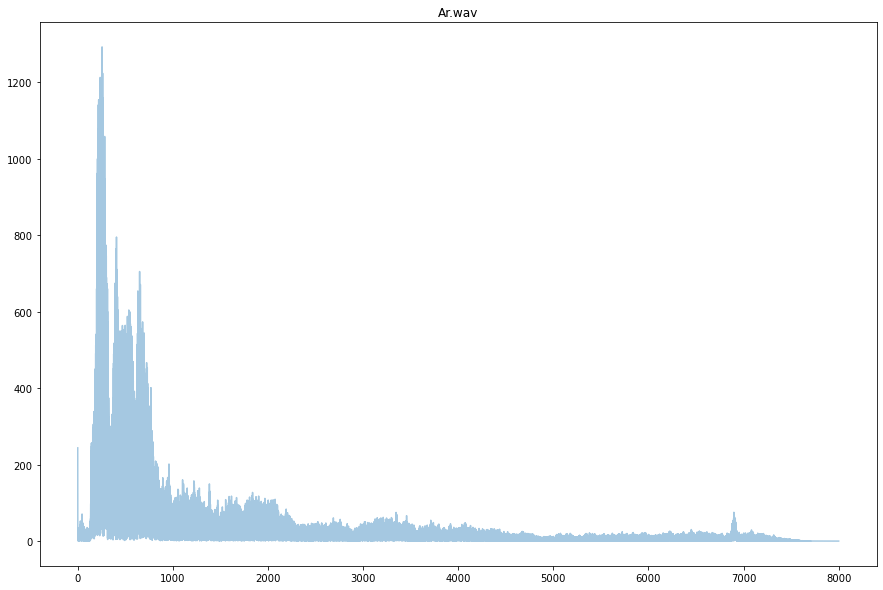

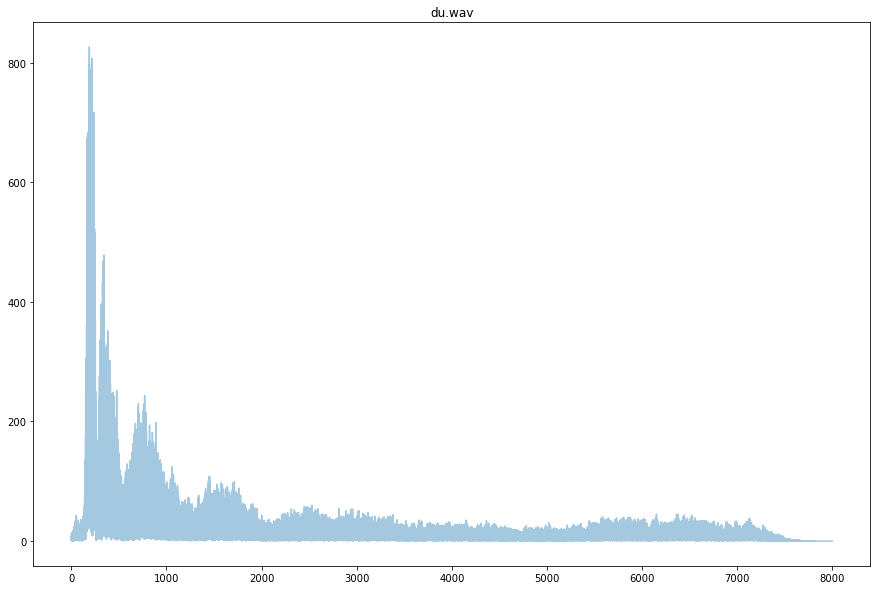

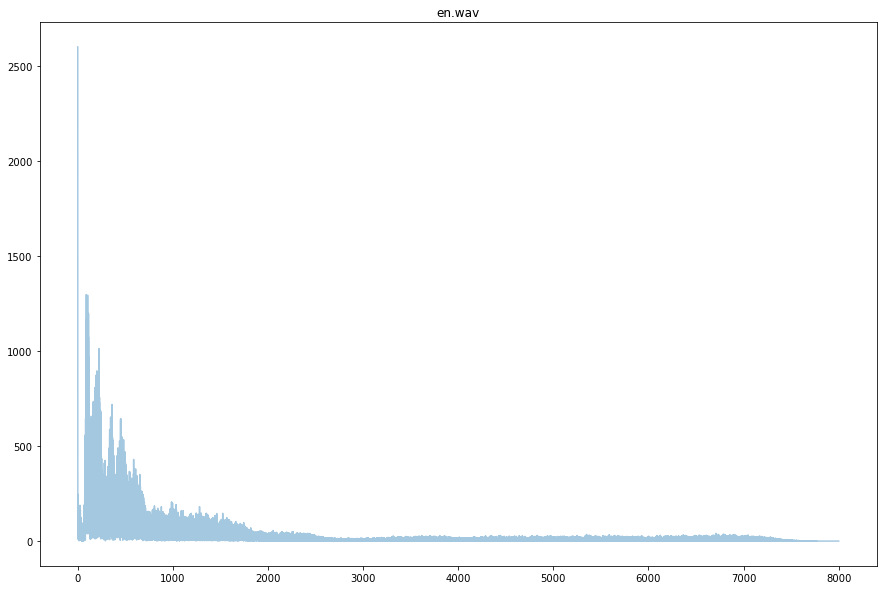

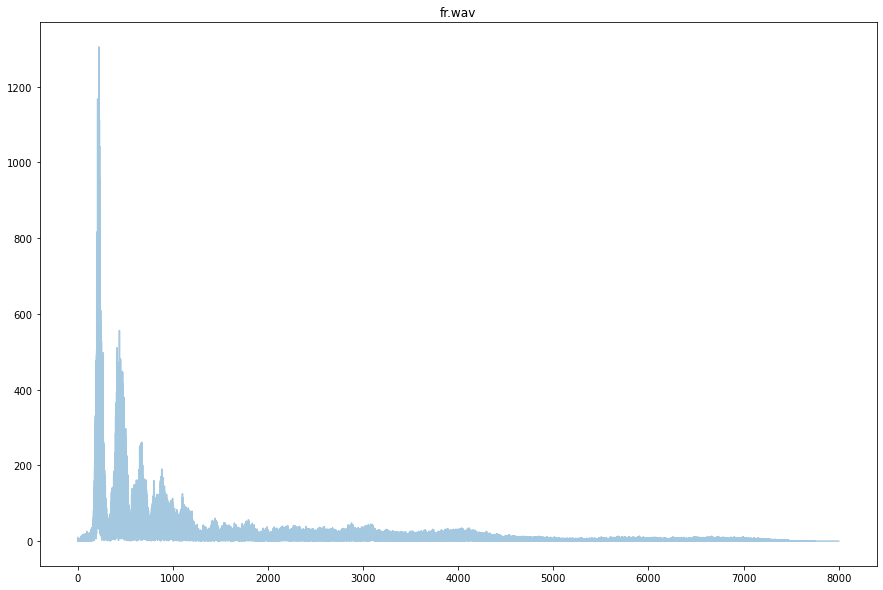

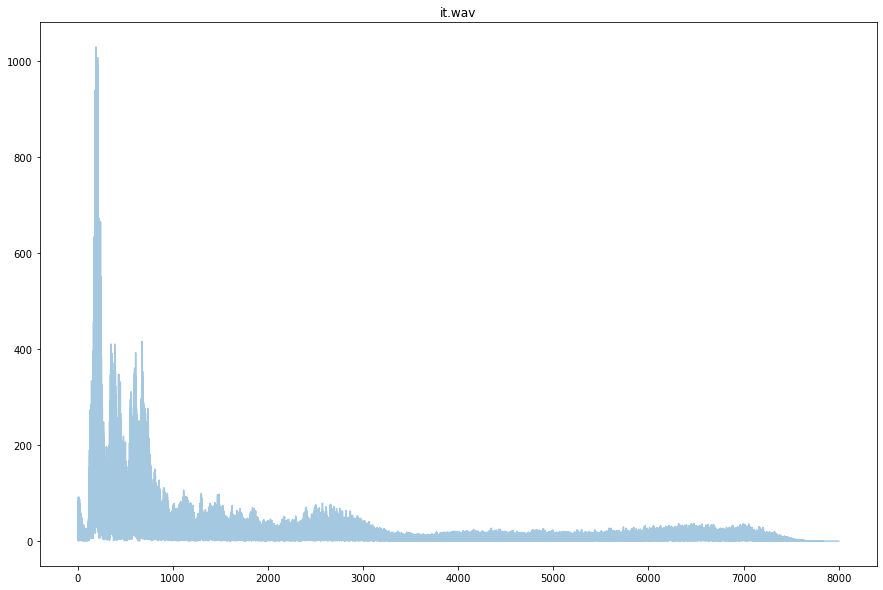

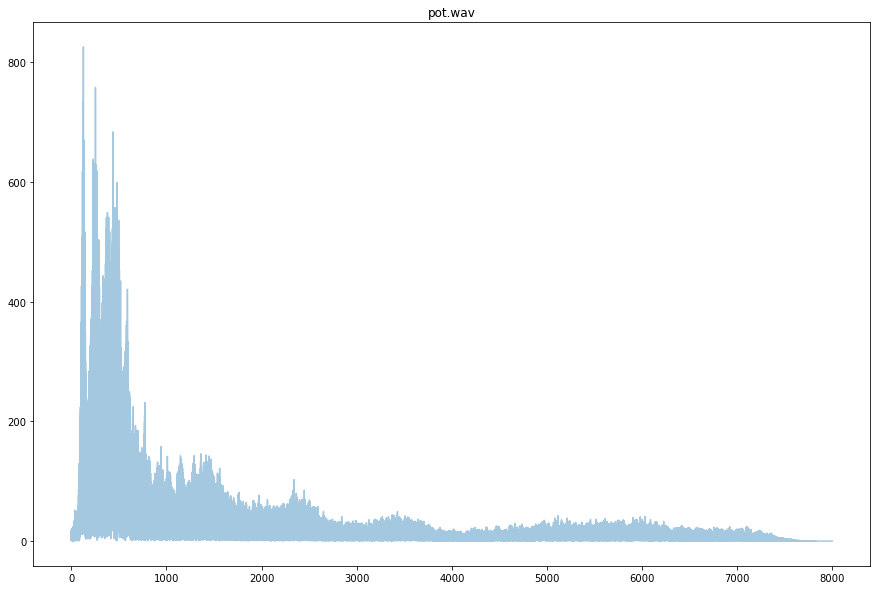

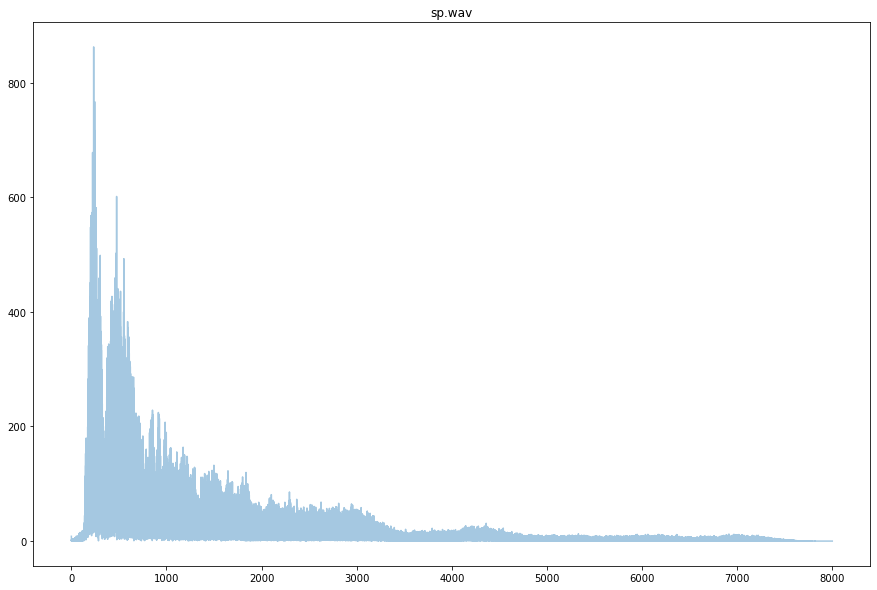

In [135]:
for File in FilesNames:
    
    plt.figure(figsize=(15,10))

    y, sr = librosa.load(f"Test_Lan/{File}",mono=True,sr=16000)

    fft = np.fft.fft(y)

    spectrum = np.abs(fft)

    f = np.linspace(0, sr, len(spectrum))
    left_f=f[:int(len(f)/2)]

    left_spectrum=spectrum[:int(len(spectrum)/2)]
    plt.plot(left_f, left_spectrum, alpha=0.4)

    plt.title(File)
    plt.show()